In [1]:
import os
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 as cv
from keras import datasets, layers, models
import time

In [2]:
def data_load(root_path, scale=(256,256)):
  categories =  os.listdir(root_path) 
  x = []
  y =[]
  for i, cat in enumerate(categories):
    img_path = os.path.join(root_path, cat)
    images = os.listdir(img_path)
    for image in images:
      img = cv2.imread(os.path.join(img_path, image), 0)
      img = cv2.resize(img, scale)
      x.append(img)
      y.append(i)
  return np.array(x), np.array(y)
x_train, y_train = data_load('./Test')

2


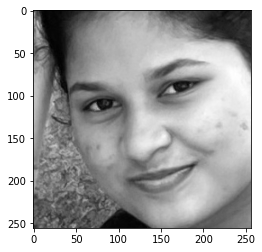

In [3]:
i = 18
print(y_train[i])
plt.imshow(x_train[i], cmap="gray")

In [4]:
print(x_train[i].shape)

(256, 256)


In [5]:
X_train_flattened = x_train.reshape(len(x_train),256*256)/255

In [6]:
model = models.Sequential()
model.add(layers.Dense(1000, activation='sigmoid', input_shape=(65536,)))
model.add(layers.Dense(100, activation='sigmoid', input_shape=(1000,)))
model.add(layers.Dense(4, activation='sigmoid', input_shape=(100,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              65537000  
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 65,637,504
Trainable params: 65,637,504
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
model.fit(X_train_flattened, y_train, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.4164 - accuracy: 0.1923
Epoch 2/30
1/1 [==============================] - 0s 376ms/step - loss: 1.5587 - accuracy: 0.4615
Epoch 3/30
1/1 [==============================] - 0s 385ms/step - loss: 1.3415 - accuracy: 0.4615
Epoch 4/30
1/1 [==============================] - 0s 385ms/step - loss: 1.2067 - accuracy: 0.4615
Epoch 5/30
1/1 [==============================] - 0s 416ms/step - loss: 1.1336 - accuracy: 0.5385
Epoch 6/30
1/1 [==============================] - 0s 421ms/step - loss: 1.0774 - accuracy: 0.3462
Epoch 7/30
1/1 [==============================] - 0s 473ms/step - loss: 0.9988 - accuracy: 0.3462
Epoch 8/30
1/1 [==============================] - 0s 464ms/step - loss: 0.9356 - accuracy: 0.7308
Epoch 9/30
1/1 [==============================] - 0s 424ms/step - loss: 0.9033 - accuracy: 0.8077
Epoch 10/30
1/1 [==============================] - 0s 426ms/step - loss: 0.8989 - accuracy: 0.8077
Epoch 11/30
1/1 [=====

In [9]:
name={0:"Ayesh",1:"Janith",2:"Nawodi"}

Ayesh


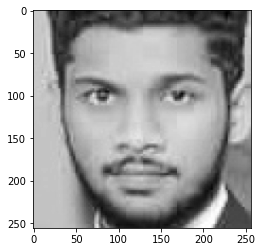

In [10]:
j=26
img_gray = cv.imread("Image\\"+str(j)+".jpg")
img_gray = cv.cvtColor(img_gray, cv.COLOR_RGB2GRAY)
img_resize = cv.resize(img_gray, (256,256), interpolation = cv.INTER_AREA)
plt.imshow(img_resize, cmap="gray")
img_resize = img_resize.reshape(256*256,)/255
img_resize = np.array([img_resize]) 
pradict = model.predict(img_resize)
print(name[np.argmax(pradict[0])])

In [11]:
face_cascade = cv.CascadeClassifier("Sourse//Face.xml")

In [12]:
def Detect_Fase(frame):
    img_gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    for face in face_cascade.detectMultiScale(img_gray, 1.3, 5):
        x, y, w, h = face
        face_gray = img_gray[y:y+h,x:x+w]
        img_resize = cv.resize(face_gray, (256,256), interpolation = cv.INTER_AREA)
        img_resize = img_resize.reshape(256*256,)/255
        img_resize = np.array([img_resize]) 
        pradict = model.predict(img_resize)
        pname = name[np.argmax(pradict[0])]
        cv2.putText(img=frame, text=pname, org=(150, y), fontFace=cv2.FONT_HERSHEY_SCRIPT_COMPLEX, fontScale=4, color=(255,255,0), thickness=3)
        cv.imshow('Video',frame)
        

In [28]:
capture = cv.VideoCapture(0)
frame_rate = 10
prev = 0
while True:
    time_elapsed = time.time() - prev
    isTrue,frame = capture.read()
    if time_elapsed > 1./frame_rate:
        prev = time.time()
        Detect_Fase(frame)
    
    if cv.waitKey(20) & 0xFF==ord('d') and 0:
        break

capture.release()
cv.destroyAllWindows()